In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import joblib

In [27]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

sns.set_theme(color_codes=True, style='darkgrid', palette='deep', font='sans-serif')

plt.style.use('fivethirtyeight')

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

In [41]:
maindata = pd.read_csv('./data/stockx_vyuki3.csv', on_bad_lines = "skip", low_memory=False)

In [43]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   urlKey                          20510 non-null  object 
 1   brand                           20510 non-null  object 
 2   condition                       20510 non-null  object 
 3   productCategory                 20510 non-null  object 
 4   gender                          20510 non-null  object 
 5   thumbUrl                        20510 non-null  object 
 6   retailPrice                     19718 non-null  float64
 7   releaseDate                     16701 non-null  object 
 8   averagePrice_Dead_Stock         20510 non-null  int64  
 9   averagePrice_Annual_Statistics  20510 non-null  int64  
 10  salesCount_Annual               20510 non-null  int64  
 11  primaryTitle                    20510 non-null  object 
 12  secondaryTitle                  

In [44]:
print("Number of Rows", maindata.shape[0])
print("Number of Columns", maindata.shape[1])

Number of Rows 20510
Number of Columns 84


In [65]:
# List of 'size' and 'lastSale' columns
size_columns = ['size{}'.format(i) for i in range(1, 31)]
lastSale_columns = ['lastSale{}'.format(i) for i in range(1, 31)]

listSize = []
for column in size_columns:
    unique_elements = list(set(maindata[column]))  # Get unique elements from the column
    listSize.append(unique_elements)

print("Unique sizes:", listSize)
# # Clean 'size' columns by removing 'W's and converting to numeric
# for column in size_columns:
#     maindata[column] = maindata[column].astype(str).str.replace('W', '', regex=True)
#     maindata[column] = pd.to_numeric(maindata[column], errors='coerce')

# # Convert 'lastSale' columns to numeric
# for column in lastSale_columns:
#     maindata[column] = pd.to_numeric(maindata[column], errors='coerce')

Unique sizes: [['', '2.5K', '5 ', '1', '9', '6', '4.5', '0', '4K', '35', '10.5K', '7.5', '2', '23', '3.5K', '3', '18', '11', '8.5', '5.5', '34', '5 2E ide', '2.5', '6.5', '4', '13.5', '12', '14', '4/5', '7', '5', '10.5c', '15', '8', '10', '10.5', '3.5', '5/6', '3K'], ['8W', '14.5W', '1', '7 Wide', '6', '5.5W', '12C', '2.5Y', '35.5', '4.5', '4K', '13C', '4.5Y', '4.5K', '11c', '3Y', '7W', '5.5 W', '16', '13', '5.4', '10.5K', '7.5', '2', '34.5', '5/6W', '2.5C', '5K', '18', '3', '11', '4.5W', '5.5', '8.5', '3C', '2C', '5W', '3.5 2E Wide', '23.5', '11.5C', '1C', '2.5', '3.5Y', '5C', '4C', '6.5', '4', '5.5 2E Wide', '7', '6W', '5', nan, '15', '1.5Y', '8', '4Y', '5.5/6.5W', '14.5', '4W', '.4.5', '3.5W', '10.5', '3.5', '11C', '10.5C', '5W 2E Wide', '5 2E Wide', '11K', '3K', '6C'], ['4 2E', '15.5W', '11.5K', '9', '11.5', '6', '5.5W', '1Y', '12C', '13C', '4.5', '24', '7W', '4.5Y', '2Y', '36', '35', '4.5K', '3Y', '8.5W', '5Y', '5.5K', '16', '7.5', '2', '2.5C', '5K', '3.5K', '3', '5Wide', '11', '4

In [31]:
price_columns = [
    'averagePrice_Annual_Statistics',
    'averagePrice_Dead_Stock',
    'retailPrice'
]
for column in price_columns:
  maindata[column] = pd.to_numeric(maindata[column], errors='coerce')

In [32]:
maindata.head()

,urlKey,brand,condition,productCategory,gender,thumbUrl,retailPrice,releaseDate,averagePrice_Dead_Stock,averagePrice_Annual_Statistics,salesCount_Annual,primaryTitle,...,size25,lastSale25,size26,lastSale26,size27,lastSale27,size28,lastSale28,size29,lastSale29,size30,lastSale30
0,nike-air-force-1-mid-off-white-black,Nike,New,sneakers,men,https://images.stockx.com/images/Nike-Air-Forc...,185.0,2022-06-23,167,167,4589,Nike Air Force 1 Mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nike-air-force-1-mid-sp-off-white-varsity-maize,Nike,New,sneakers,men,https://images.stockx.com/images/Nike-Air-Forc...,205.0,2023-11-09,155,155,2146,Nike Air Force 1 Mid SP,...,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nike-air-force-1-mid-off-white-white,Nike,New,sneakers,men,https://images.stockx.com/images/Nike-Air-Forc...,185.0,2022-06-23,159,159,2699,Nike Air Force 1 Mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nike-air-force-1-mid-off-white-pine-green,Nike,New,sneakers,men,https://images.stockx.com/images/Nike-Air-Forc...,205.0,2023-04-28,180,180,4139,Nike Air Force 1 Mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nike-air-force-1-react-black-violet-star-barel...,Nike,New,sneakers,men,https://images.stockx.com/images/Nike-Air-Forc...,120.0,2020-01-17,141,141,16,Nike Air Force 1 React,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
maindata['releaseDate'] = pd.to_datetime(maindata['releaseDate'], format='mixed', errors='coerce')
maindata['days_postRelease'] = (pd.Timestamp.now() - maindata['releaseDate']).dt.days

In [34]:
maindata.columns

Index(['urlKey', 'brand', 'condition', 'productCategory', 'gender', 'thumbUrl', 'retailPrice',
       'releaseDate', 'averagePrice_Dead_Stock', 'averagePrice_Annual_Statistics',
       'salesCount_Annual', 'primaryTitle', 'secondaryTitle', 'colorWay', 'color1', 'color2',
       'color3', 'color4', 'color5', 'color6', 'color7', 'color8', 'color9', 'color10', 'size1',
       'lastSale1', 'size2', 'lastSale2', 'size3', 'lastSale3', 'size4', 'lastSale4', 'size5',
       'lastSale5', 'size6', 'lastSale6', 'size7', 'lastSale7', 'size8', 'lastSale8', 'size9',
       'lastSale9', 'size10', 'lastSale10', 'size11', 'lastSale11', 'size12', 'lastSale12',
       'size13', 'lastSale13', 'size14', 'lastSale14', 'size15', 'lastSale15', 'size16',
       'lastSale16', 'size17', 'lastSale17', 'size18', 'lastSale18', 'size19', 'lastSale19',
       'size20', 'lastSale20', 'size21', 'lastSale21', 'size22', 'lastSale22', 'size23',
       'lastSale23', 'size24', 'lastSale24', 'size25', 'lastSale25', 'size26',

In [35]:
# Define a list of size columns and lastSale columns
size_columns = [col for col in maindata.columns if 'size' in col]
lastSale_columns = [col for col in maindata.columns if 'lastSale' in col]

# Pair the size columns and lastSale columns correctly
pairs = list(zip(size_columns, lastSale_columns))

additional_columns = ['urlKey', 'brand', 'gender', 'thumbUrl', 'retailPrice',
       'days_postRelease', 'averagePrice_Dead_Stock', 'averagePrice_Annual_Statistics',
       'salesCount_Annual', 'primaryTitle', 'secondaryTitle', 'color1']

# Use pd.melt to transform each pair and concatenate them into a new dataframe
melted_dfs = []
for size_col, sale_col in pairs:
    # Melt the DataFrame with the specific size and lastSale columns
    melted_df = maindata.melt(id_vars=additional_columns, value_vars=[size_col, sale_col], var_name='variable', value_name='value')

    # Determine if the row is from size or lastSale based on 'variable' and then assign to 'size' or 'lastSale'
    melted_df['size'] = melted_df.apply(lambda row: row['value'] if 'size' in row['variable'] else np.nan, axis=1)
    melted_df['lastSale'] = melted_df.apply(lambda row: row['value'] if 'lastSale' in row['variable'] else np.nan, axis=1)

    # Drop the intermediate columns
    melted_df.drop(['variable', 'value'], axis=1, inplace=True)
    melted_dfs.append(melted_df)

# Concatenate all the small dataframes into one
df0 = pd.concat(melted_dfs, ignore_index=True)

# Forward fill the NaNs for the 'size' column as each 'lastSale' entry should correspond to its above 'size'
df0['size'] = df0['size'].ffill()

# Drop the rows where 'lastSale' is NaN because we only want complete size-lastSale pairs
df0.dropna(subset=['size', 'lastSale'], inplace=True)

# Remove rows where 'size' or 'lastSale' is 0.0
df0 = df0[(df0['size'] != 0.0) & (df0['lastSale'] != 0.0)]

# Reset the index of the final DataFrame
df0.reset_index(drop=True, inplace=True)

In [36]:
print("Number of Rows", df0.shape[0])
print("Number of Columns", df0.shape[1])

Number of Rows 16437
Number of Columns 14


In [37]:
# Check for null values in the DataFrame
df0.isnull().sum()

urlKey                               0
brand                                0
gender                               0
thumbUrl                             0
retailPrice                         12
days_postRelease                  2286
averagePrice_Dead_Stock              0
averagePrice_Annual_Statistics       0
salesCount_Annual                    0
primaryTitle                         0
secondaryTitle                       0
color1                               0
size                                 0
lastSale                             0
dtype: int64

In [38]:
df0['retailPrice'].fillna(df0['retailPrice'].median(), inplace=True)
df0['days_postRelease'].fillna(df0['days_postRelease'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17276\1327653308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df0['retailPrice'].fillna(df0['retailPrice'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17276\1327653308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [39]:
df0.columns

Index(['urlKey', 'brand', 'gender', 'thumbUrl', 'retailPrice', 'days_postRelease',
       'averagePrice_Dead_Stock', 'averagePrice_Annual_Statistics', 'salesCount_Annual',
       'primaryTitle', 'secondaryTitle', 'color1', 'size', 'lastSale'],
      dtype='object')

In [40]:
df0.describe()

,retailPrice,days_postRelease,averagePrice_Dead_Stock,averagePrice_Annual_Statistics,salesCount_Annual,size,lastSale
count,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000
mean,123.521932,946.373547,184.430918,184.430918,421.659366,8.838657,373.091562
std,57.657982,681.760458,418.848262,418.848262,2750.995850,2.865889,3157.057121
min,45.000000,9.000000,0.000000,0.000000,0.000000,4.000000,13.000000
25%,100.000000,533.000000,99.000000,99.000000,19.000000,6.500000,97.000000
50%,120.000000,784.000000,122.000000,122.000000,64.000000,8.500000,128.000000
75%,140.000000,1151.000000,168.000000,168.000000,216.000000,11.000000,184.000000
max,2750.000000,8003.000000,12033.000000,12033.000000,63031.000000,18.000000,129900.000000


In [21]:
df0['lastSale'].max()

21462000.0

In [26]:
df0['brand'].value_counts()

brand
Nike           115535
adidas          61597
Jordan          21424
New Balance     11287
ASICS            3789
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

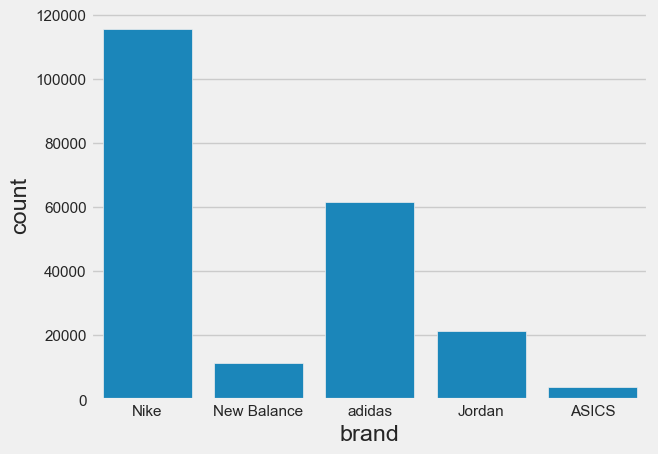

In [27]:
sns.countplot(x = "brand", data=df0)

In [28]:
df0['gender'].value_counts()

gender
men          171688
women         26666
child          7701
preschool      3050
unisex         2424
toddler        1923
infant          180
Name: count, dtype: int64

In [29]:
df0.loc[df0['gender'].isin(['preschool', 'toddler', 'infant', 'child']), 'gender'] = 'Child'
df0.loc[df0['gender'] == 'unisex', 'gender'] = 'Unisex'
df0.loc[df0['gender'] == 'men', 'gender'] = 'Men'
df0.loc[df0['gender'] == 'women', 'gender'] = 'Women'

In [30]:
df0['gender'].value_counts()

gender
Men       171688
Women      26666
Child      12854
Unisex      2424
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

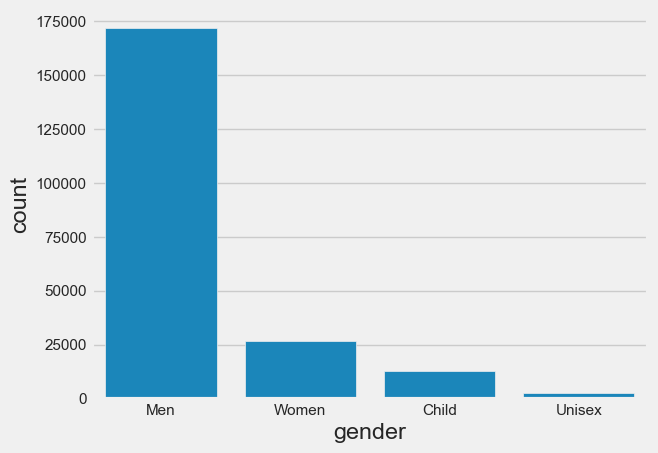

In [31]:
sns.countplot(x = "gender", data=df0)

In [32]:
df0['retailPrice'].value_counts(), df0['averagePrice_Dead_Stock'].value_counts(), df0['averagePrice_Annual_Statistics'].value_counts()

(retailPrice
 100.0    18586
 110.0    17781
 120.0    16126
 180.0    15818
 130.0    15112
          ...  
 97.0         2
 176.0        2
 610.0        2
 103.0        2
 890.0        2
 Name: count, Length: 159, dtype: int64,
 averagePrice_Dead_Stock
 0        18175
 107       1816
 98        1733
 118       1695
 100       1679
          ...  
 36500        1
 8200         1
 7600         1
 1987         1
 34000        1
 Name: count, Length: 1405, dtype: int64,
 averagePrice_Annual_Statistics
 0        18175
 107       1816
 98        1733
 118       1695
 100       1679
          ...  
 36500        1
 8200         1
 7600         1
 1987         1
 34000        1
 Name: count, Length: 1405, dtype: int64)

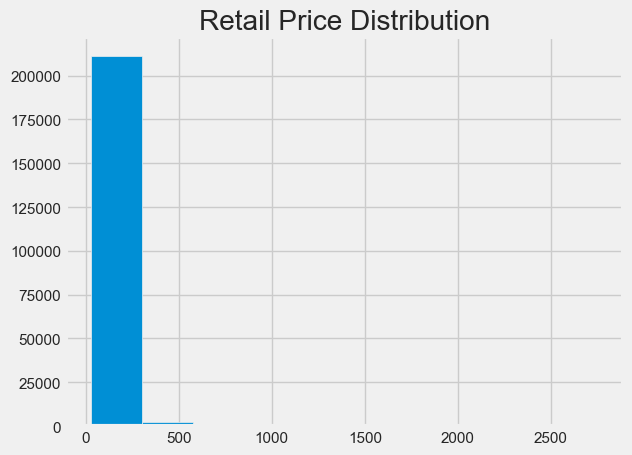

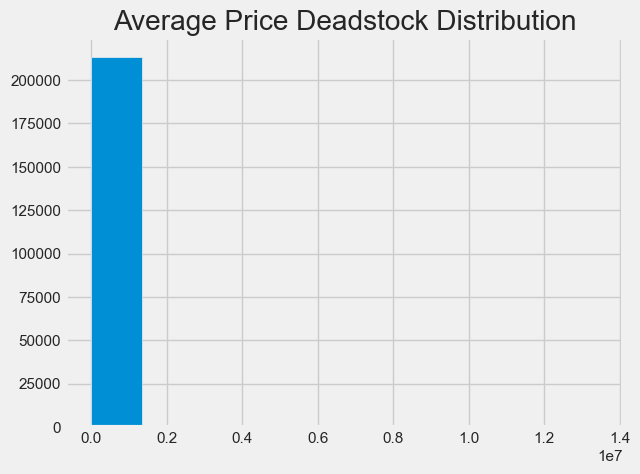

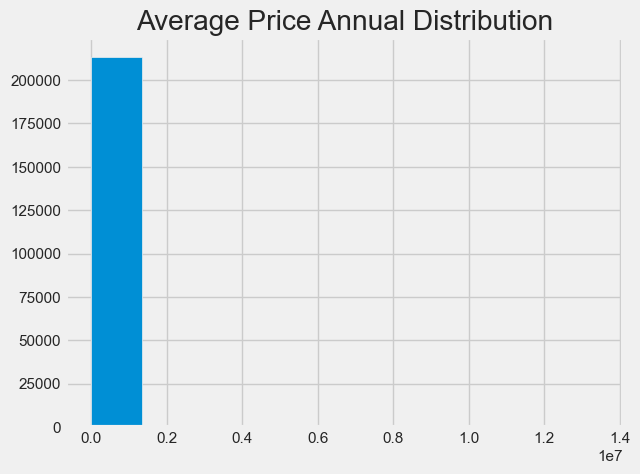

In [33]:
plt.hist(x = "retailPrice", data=df0)
plt.title("Retail Price Distribution")
plt.show()

plt.hist(x = "averagePrice_Dead_Stock", data=df0)
plt.title("Average Price Deadstock Distribution")
plt.show()

plt.hist(x = "averagePrice_Annual_Statistics", data=df0)
plt.title("Average Price Annual Distribution")
plt.show()

In [34]:
df0['days_postRelease'].value_counts()

days_postRelease
1185.0    16030
2279.0     1463
1914.0     1384
963.0      1072
2644.0     1067
          ...  
5751.0        1
1899.0        1
5159.0        1
4873.0        1
4558.0        1
Name: count, Length: 3316, dtype: int64

In [35]:
df0['salesCount_Annual'].value_counts()

salesCount_Annual
0       18175
1       11826
2       10129
3        7764
4        6618
        ...  
1856        8
1295        8
6596        8
2635        8
795         8
Name: count, Length: 1683, dtype: int64

In [36]:
df0['primaryTitle'].value_counts()

primaryTitle
Nike Dunk Low                              7290
adidas NMD R1                              6801
Nike SB Dunk Low                           5936
New Balance 327                            4401
Nike Air Force 1 Low                       4382
                                           ... 
adidas Retrorun                               1
adidas X Speedflow.1 AG                       1
Nike Mercurial Vapor 13 Elite SG Pro AC       1
Stan Smith                                    1
adidas Stan Smith Mid                         1
Name: count, Length: 2574, dtype: int64

In [37]:
df0['color1'].value_counts()

color1
White                   36714
Black                   35347
Core Black              14126
Cloud White              7578
Sail                     5196
                        ...  
Eggshell Grey               1
Slate                       1
Purple Haze                 1
Active Maroon               1
Team Collegiate Gold        1
Name: count, Length: 2081, dtype: int64

In [38]:
df0.columns

Index(['urlKey', 'brand', 'gender', 'thumbUrl', 'retailPrice', 'days_postRelease',
       'averagePrice_Dead_Stock', 'averagePrice_Annual_Statistics', 'salesCount_Annual',
       'primaryTitle', 'secondaryTitle', 'color1', 'size', 'lastSale'],
      dtype='object')

<Axes: xlabel='brand', ylabel='lastSale'>

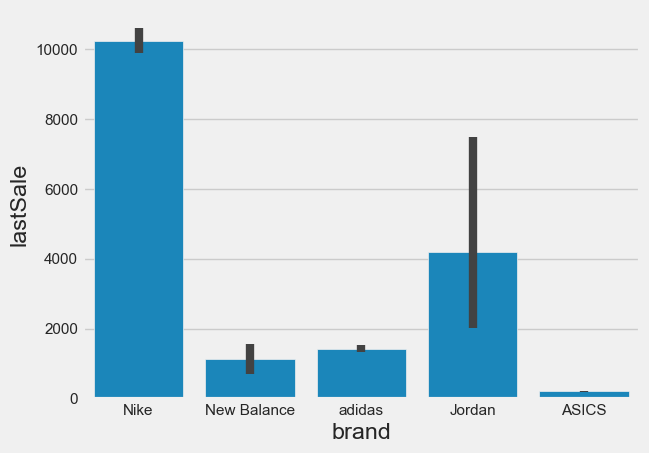

In [39]:
sns.barplot(x = "brand", y = "lastSale", data=df0)

<Axes: xlabel='gender', ylabel='lastSale'>

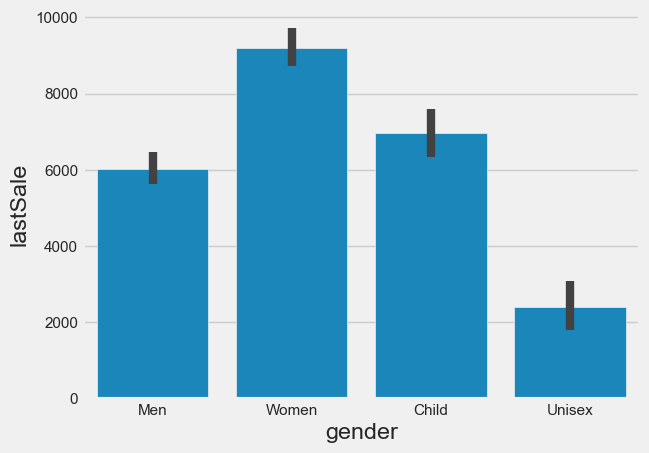

In [40]:
sns.barplot(x = "gender", y = "lastSale", data=df0)

<Axes: xlabel='size', ylabel='lastSale'>

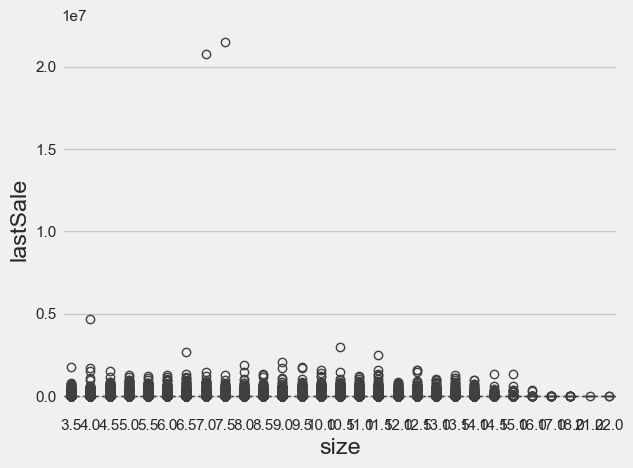

In [41]:
sns.boxplot(x = "size", y = "lastSale", data=df0)

In [22]:
df0.columns

Index(['urlKey', 'brand', 'gender', 'thumbUrl', 'retailPrice', 'days_postRelease',
       'averagePrice_Dead_Stock', 'averagePrice_Annual_Statistics', 'salesCount_Annual',
       'primaryTitle', 'secondaryTitle', 'color1', 'size', 'lastSale'],
      dtype='object')

<Axes: xlabel='size', ylabel='averagePrice_Annual_Statistics'>

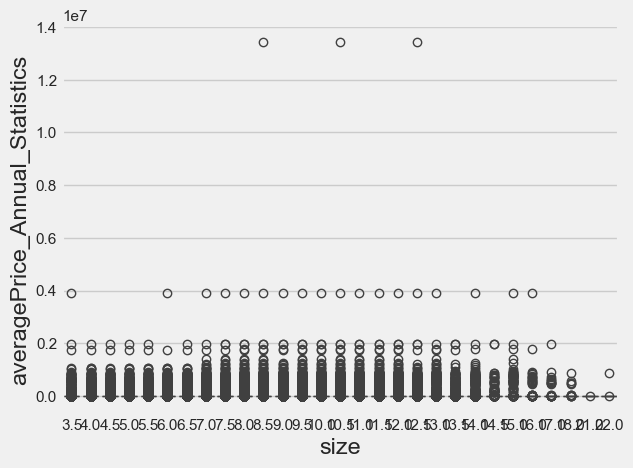

In [23]:
sns.boxplot(x = "size", y = "averagePrice_Annual_Statistics", data=df0)

<Axes: xlabel='size', ylabel='retailPrice'>

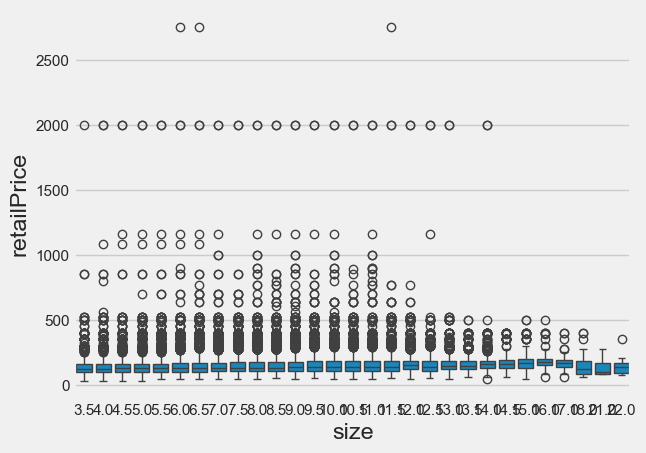

In [25]:
sns.boxplot(x = "size", y = "retailPrice", data=df0)

In [42]:
df1 = df0.copy()

In [43]:
cat_cols = df1.select_dtypes(include='object').columns
cat_cols

Index(['urlKey', 'brand', 'gender', 'thumbUrl', 'primaryTitle', 'secondaryTitle', 'color1'], dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

# for i in cat_cols:
#     df1[i] = en.fit_transform(df1[i])

for i in df1.columns: # Make a for loops
    if df1[i].dtype == 'object': 
        en.fit_transform(list(df1[i].values)) # Fit transform
        df1["ori_"+i] = df1[i]
        df1[i] = en.transform(df1[i].values) # Transform
         
        for j in df1.columns: # Make a for loops again
            if df1[j].dtype == 'int':
                df1[j] = df1[j].astype('float64') # Change the type

df1.head(2)

,urlKey,brand,gender,thumbUrl,retailPrice,days_postRelease,averagePrice_Dead_Stock,averagePrice_Annual_Statistics,salesCount_Annual,primaryTitle,secondaryTitle,color1,size,lastSale,ori_urlKey,ori_brand,ori_gender,ori_thumbUrl,ori_primaryTitle,ori_secondaryTitle,ori_color1
0,11145.0,3.0,1.0,5326.0,185.0,645.0,167,167,4589,292.0,7792.0,153.0,3.5,92.0,nike-air-force-1-mid-off-white-black,Nike,Men,https://images.stockx.com/images/Nike-Air-Forc...,Nike Air Force 1 Mid,Off-White Black,Black
1,11159.0,3.0,1.0,5340.0,205.0,141.0,155,155,2146,302.0,7876.0,2019.0,3.5,130.0,nike-air-force-1-mid-sp-off-white-varsity-maize,Nike,Men,https://images.stockx.com/images/Nike-Air-Forc...,Nike Air Force 1 Mid SP,Off-White Varsity Maize,White


In [45]:
df1.columns

Index(['urlKey', 'brand', 'gender', 'thumbUrl', 'retailPrice', 'days_postRelease',
       'averagePrice_Dead_Stock', 'averagePrice_Annual_Statistics', 'salesCount_Annual',
       'primaryTitle', 'secondaryTitle', 'color1', 'size', 'lastSale', 'ori_urlKey', 'ori_brand',
       'ori_gender', 'ori_thumbUrl', 'ori_primaryTitle', 'ori_secondaryTitle', 'ori_color1'],
      dtype='object')

In [46]:
df2 = df1[['brand', 'gender', 'retailPrice', 'days_postRelease',
       'averagePrice_Dead_Stock', 'averagePrice_Annual_Statistics', 'salesCount_Annual',
       'primaryTitle', 'color1', 'size', 'lastSale', 'ori_urlKey', 'ori_brand',
       'ori_gender', 'ori_thumbUrl', 'ori_primaryTitle', 'ori_secondaryTitle', 'ori_color1']]

In [47]:
df2.head(2)

,brand,gender,retailPrice,days_postRelease,averagePrice_Dead_Stock,averagePrice_Annual_Statistics,salesCount_Annual,primaryTitle,color1,size,lastSale,ori_urlKey,ori_brand,ori_gender,ori_thumbUrl,ori_primaryTitle,ori_secondaryTitle,ori_color1
0,3.0,1.0,185.0,645.0,167,167,4589,292.0,153.0,3.5,92.0,nike-air-force-1-mid-off-white-black,Nike,Men,https://images.stockx.com/images/Nike-Air-Forc...,Nike Air Force 1 Mid,Off-White Black,Black
1,3.0,1.0,205.0,141.0,155,155,2146,302.0,2019.0,3.5,130.0,nike-air-force-1-mid-sp-off-white-varsity-maize,Nike,Men,https://images.stockx.com/images/Nike-Air-Forc...,Nike Air Force 1 Mid SP,Off-White Varsity Maize,White


In [48]:
df2.to_csv('./data/df_clean.csv', index=False)

In [49]:
df2.columns

Index(['brand', 'gender', 'retailPrice', 'days_postRelease', 'averagePrice_Dead_Stock',
       'averagePrice_Annual_Statistics', 'salesCount_Annual', 'primaryTitle', 'color1', 'size',
       'lastSale', 'ori_urlKey', 'ori_brand', 'ori_gender', 'ori_thumbUrl', 'ori_primaryTitle',
       'ori_secondaryTitle', 'ori_color1'],
      dtype='object')

In [50]:
df3 = df2[['brand', 'gender', 'retailPrice', 'days_postRelease', 'averagePrice_Dead_Stock',
       'averagePrice_Annual_Statistics', 'salesCount_Annual', 'primaryTitle', 'color1', 'size',
       'lastSale']]

In [51]:
# Make a correlation data to knowing Value Strength and Direction of Linear Relationship
correlation = df3.corr()
correlation

,brand,gender,retailPrice,days_postRelease,averagePrice_Dead_Stock,averagePrice_Annual_Statistics,salesCount_Annual,primaryTitle,color1,size,lastSale
brand,1.000000,0.029066,0.076687,0.006245,-0.021993,-0.021993,-0.097069,0.805535,-0.133482,0.040975,-0.005058
gender,0.029066,1.000000,-0.018851,-0.148252,-0.003816,-0.003816,0.019983,-0.022951,0.050660,-0.093716,0.010521
retailPrice,0.076687,-0.018851,1.000000,0.041339,0.014672,0.014672,-0.007861,0.082636,-0.054929,0.092746,-0.020668
days_postRelease,0.006245,-0.148252,0.041339,1.000000,0.037721,0.037721,-0.111158,0.058548,-0.045290,0.170236,-0.011363
averagePrice_Dead_Stock,-0.021993,-0.003816,0.014672,0.037721,1.000000,1.000000,-0.008554,-0.031752,0.010780,0.015085,0.030592
averagePrice_Annual_Statistics,-0.021993,-0.003816,0.014672,0.037721,1.000000,1.000000,-0.008554,-0.031752,0.010780,0.015085,0.030592
salesCount_Annual,-0.097069,0.019983,-0.007861,-0.111158,-0.008554,-0.008554,1.000000,-0.087061,0.046493,-0.000032,0.005973
primaryTitle,0.805535,-0.022951,0.082636,0.058548,-0.031752,-0.031752,-0.087061,1.000000,-0.196439,0.061045,-0.018784
color1,-0.133482,0.050660,-0.054929,-0.045290,0.010780,0.010780,0.046493,-0.196439,1.000000,-0.030259,0.023108
size,0.040975,-0.093716,0.092746,0.170236,0.015085,0.015085,-0.000032,0.061045,-0.030259,1.000000,-0.007813


[]

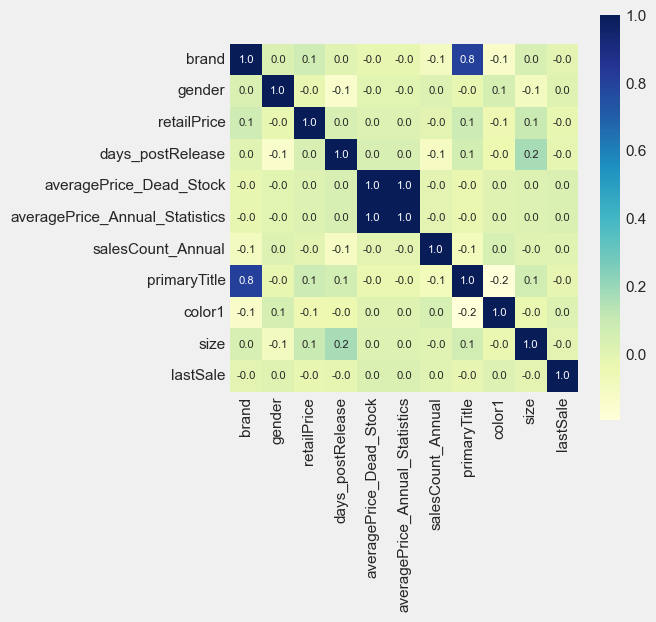

In [52]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='YlGnBu')
plt.plot()

In [53]:
df3 = df2[['brand', 'gender', 'retailPrice', 'days_postRelease', 'averagePrice_Annual_Statistics', 'primaryTitle', 'color1', 'size',
       'lastSale']]

In [54]:
X = df3.drop('lastSale', axis=1) 
y = df3['lastSale']

In [55]:
Xrf = df3.drop(['lastSale', 'gender', 'brand'], axis=1)
yrf = df3['lastSale']

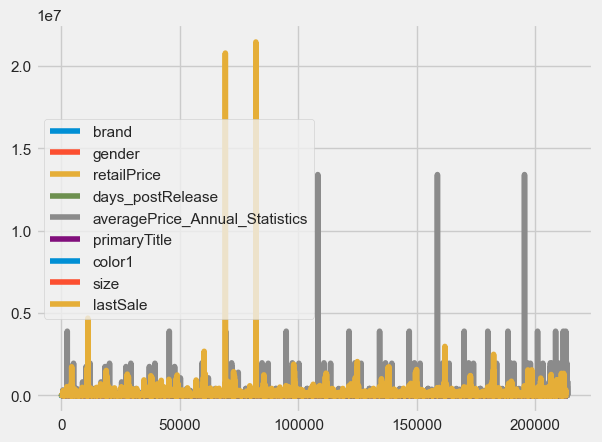

In [56]:
df3.plot()
plt.show()

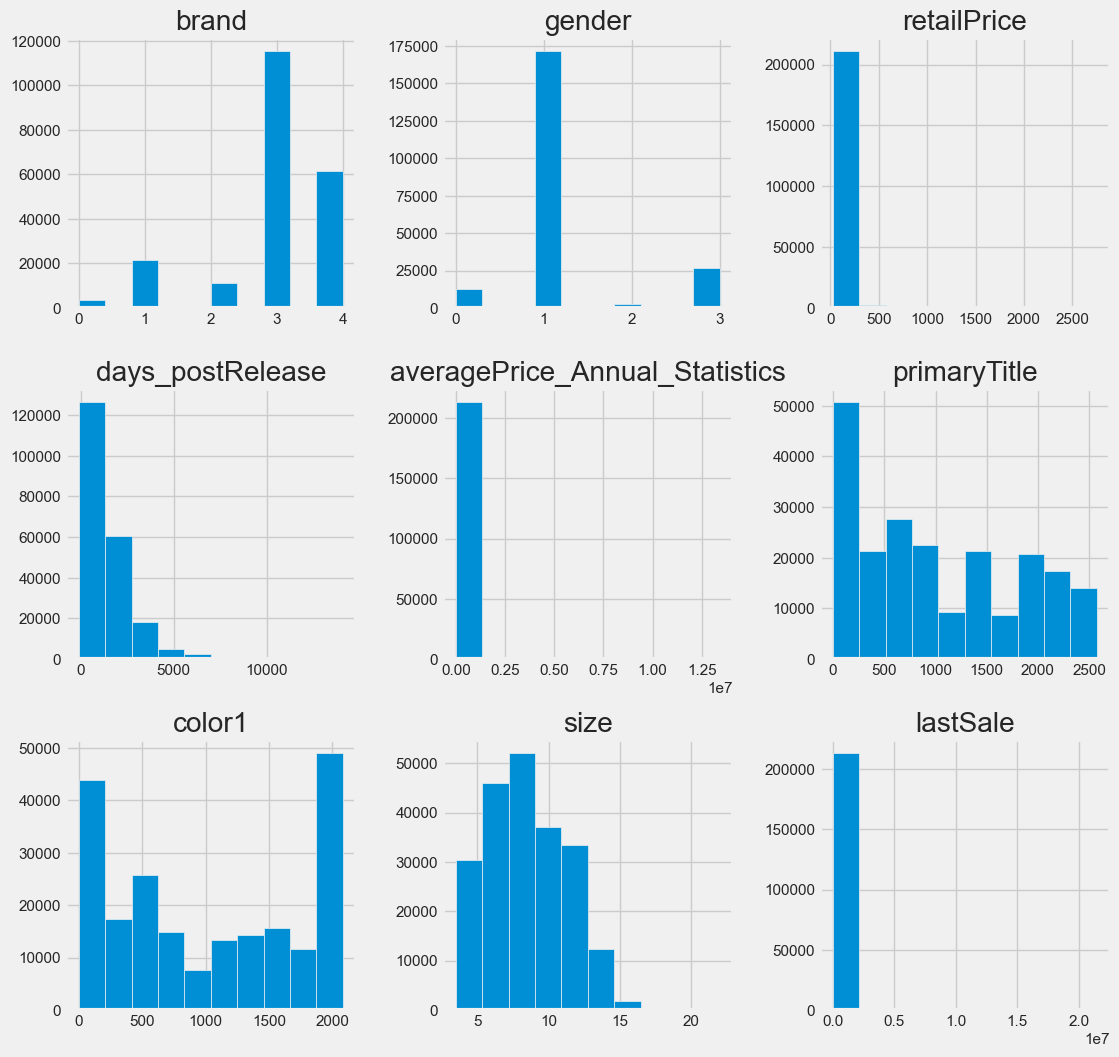

In [57]:
df3.hist(figsize=(12,12))
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

In [ ]:
rf2 = RandomForestRegressor()
rf2.fit(Xrf_train, yrf_train)

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xgb.predict(X_test)

In [ ]:
yrf_pred3 = rf2.predict(Xrf_test)

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
score5 = metrics.r2_score(y_test, y_pred5)

In [ ]:
score3rf = metrics.r2_score(yrf_test, yrf_pred3)

In [ ]:
print(score1, score2, score3, score4, score5)

In [ ]:
print(score3rf)

In [ ]:
final_data = pd.DataFrame({"Model": ["LR", "SVM", "RF", "GB", "XG"], "R2 Score": [score1, score2, score3, score4, score5]})
final_data

In [ ]:
sns.barplot(x = "Model", y = "R2 Score", data=final_data)

In [ ]:
fifr = pd.Series(rf.feature_importances_, index=X_train.columns)
fifr.plot(kind='barh')

In [ ]:
figbr = pd.Series(gbr.feature_importances_, index=X_train.columns)
figbr.plot(kind='barh')

In [ ]:
fixgb = pd.Series(xgb.feature_importances_, index=X_train.columns)
fixgb.plot(kind='barh')

Model Saving

In [ ]:
X = df3.drop('lastSale', axis=1)
y = df3['lastSale']

In [ ]:
gbr.fit(X, y)
joblib.dump(gbr, './model/gbr_model.joblib')

In [ ]:
gbr_model = joblib.load('./model/gbr_model.joblib')

# predict X train
trainPredict_gbr = gbr_model.predict(X_train)

train_output_gbr = pd.DataFrame({
    'Train Actual Price': y_train,
    'Train Predicted Price ': trainPredict_gbr,
    '%Predict ': ((trainPredict_gbr)/y_train)*100})

train_output_gbr.to_csv('./data/gbr_trainoutput.csv', index=False)

# predict X test  
testPredict_gbr = gbr_model.predict(X_test)

test_outputgbr = pd.DataFrame({
    'Test Actual Price': y_test,
    'Test Predicted Price ': testPredict_gbr,
    '%Predict ': ((testPredict_gbr)/y_test)*100})

test_outputgbr.to_csv('./data/gbr_testoutput.csv', index=False)

In [ ]:
train_prediction_outputgbr= pd.read_csv('./data/gbr_trainoutput.csv')
train_prediction_outputgbr.head(10)

In [ ]:
test_prediction_outputgbr = pd.read_csv('./data/gbr_testoutput.csv')
test_prediction_outputgbr.head(10)

In [ ]:
xgb.fit(X, y)
joblib.dump(xgb, './model/xgb_model.joblib')

In [ ]:
xgb_model = joblib.load('./model/xgb_model.joblib')

# predict X train
trainPredict_xgb = xgb_model.predict(X_train)

train_output_xgb = pd.DataFrame({
    'Train Actual Price': y_train,
    'Train Predicted Price ': trainPredict_xgb,
    '%Predict ': ((trainPredict_xgb)/y_train)*100})

train_output_xgb.to_csv('./data/xgb_trainoutput.csv', index=False)

# predict X test  
testPredict_xgb = xgb_model.predict(X_test)

test_outputxgb = pd.DataFrame({
    'Test Actual Price': y_test,
    'Test Predicted Price ': testPredict_xgb,
    '%Predict ': ((testPredict_xgb)/y_test)*100})

test_outputxgb.to_csv('./data/xgb_testoutput.csv', index=False)

In [ ]:
train_prediction_outputxgb = pd.read_csv('./data/xgb_trainoutput.csv')
train_prediction_outputxgb.head(10)

In [ ]:
test_prediction_outputxgb = pd.read_csv('./data/xgb_testoutput.csv')
test_prediction_outputxgb.head(10)

In [ ]:
rf.fit(X, y)
joblib.dump(rf, 'rf_model.joblib')

In [ ]:
rf_model = joblib.load('rf_model.joblib')

# predict X train
trainPredict_rf = rf_model.predict(X_train)

# predict X test  
testPredict_rf = rf_model.predict(X_test)

train_output_rf = pd.DataFrame({
    'Train Actual Price': y_train,
    'Train Predicted Price ': trainPredict_rf,
    '%Predict ': ((trainPredict_rf)/y_train)*100})

train_output_rf.to_csv('./data/rf_trainoutput.csv', index=False)

test_outputrf = pd.DataFrame({
    'Test Actual Price': y_test,
    'Test Predicted Price ': testPredict_rf,
    '%Predict ': ((testPredict_rf)/y_test)*100})

test_outputrf.to_csv('./data/rf_testoutput.csv', index=False)

In [ ]:
train_prediction_outputrf = pd.read_csv('./data/rf_trainoutput.csv')
train_prediction_outputrf.head(10)

In [ ]:
test_prediction_outputrf = pd.read_csv('./data/rf_testoutput.csv')
test_prediction_outputrf.head(10)

In [ ]:
dfcoba = pd.read_csv('./data/df_clean.csv')

In [ ]:
dfcoba.columns

In [ ]:
s = dfcoba[dfcoba['ori_brand']=='Nike']['brand'].unique()

print(s[0])

In [ ]:
s2f = dfcoba[dfcoba['ori_color1']== 'Black']['color1'].unique()[0]

print(s2f)

In [ ]:
s4f = dfcoba[dfcoba['ori_gender']== 'Men']['gender'].unique()[0]

print(s4f)

In [ ]:
# s5f = dfcoba[dfcoba['ori_primaryTitle'].str.contains('Nike')].groupby('ori_primaryTitle')['primaryTitle'].first().reset_index()['primaryTitle']

dfcoba[dfcoba['ori_primaryTitle'].str.contains('Nike Air Force 1 Mid')]['primaryTitle'].unique()[0]

# print(s5f)

In [ ]:
dfcoba.columns

In [ ]:
dfcoba.head(1)

In [ ]:
# txbrand 
# txcolor 
# txgender
# txsize
# txmodel

# 'primaryTitle' = Tune

# 'retailPrice' = API
# 'days_postRelease' = API
# 'averagePrice_Annual_Statistics' = API

# 'brand' = OK
# 'gender' = OK
# 'retailPrice' = API
# 'days_postRelease' = API
# 'primaryTitle' = Tune 
# 'color1' = OK
# 'size' = OK
# 'lastSale' = API

# def proper_case(s):
#     return s.title()

# dfgender = dfgender.apply(proper_case)

# df = pd.DataFrame({
#     'brand': '',
#     'gender': '',
#     'retailPrice': '', 
#     'days_postRelease': '', 
#     'averagePrice_Annual_Statistics': '',
#     'primaryTitle': '',
#     'color1': '',
#     'size': '',
#     'lastSale':''
#     }, index=[0])

In [ ]:
def getFeatures(model, size, brand, gender, color):

    txbrand = dfcoba[dfcoba['ori_brand'] == brand]['brand'].unique()

    txcolor = dfcoba[dfcoba['ori_color1']== color]['color1'].unique()[0]

    txmodel = dfcoba[dfcoba['ori_primaryTitle'].str.contains(model)]['primaryTitle'].unique()[0]

    txgender = dfcoba[dfcoba['ori_gender']== gender]['gender'].unique()[0]

    txretailPrice = dfcoba[(dfcoba['ori_primaryTitle'].str.contains(model)) & (dfcoba['size'] == size) & (dfcoba['ori_brand'] == brand) & (dfcoba['ori_gender'] == gender) & (dfcoba['ori_color1'] == color)]['retailPrice'].mean()

    txdaysPostRelease = dfcoba[(dfcoba['ori_primaryTitle'].str.contains(model)) & (dfcoba['size'] == size) & (dfcoba['ori_brand'] == brand) & (dfcoba['ori_gender'] == gender) & (dfcoba['ori_color1'] == color)]['retailPrice'].mean()

    txaverageAnnualPrice = dfcoba[(dfcoba['ori_primaryTitle'].str.contains(model)) & (dfcoba['size'] == size) & (dfcoba['ori_brand'] == brand) & (dfcoba['ori_gender'] == gender) & (dfcoba['ori_color1'] == color)]['retailPrice'].mean()

    df = pd.DataFrame({
        'brand': txbrand,
        'gender': txgender,
        'retailPrice': txretailPrice, 
        'days_postRelease': txdaysPostRelease, 
        'averagePrice_Annual_Statistics': txaverageAnnualPrice,
        'primaryTitle': txmodel,
        'color1': txcolor,
        'size': size
    }, index=[0])

    return df

getFeatures('Nike Air Force 1 Mid', 10, 'Nike', 'Men', 'Black')['brand'][0]